<center>
<img src="../images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de Pattern Classsification Duda, Hart, Stork. Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.Copyright (c) 2019 [Georgina Flesia](georgina.flesia@unc.edu.ar)


In [1]:
import warnings
warnings.filterwarnings("ignore")

# IntML2020 - Clasificación sobre Winsconsin breast cancer dataset - Logistic regression


# Ejercicio 1: 

Sea $y$ la etiqueta de clase, $y=1$ cuando $\mathbf{x}$ pertenece a la clase 1 e $y=0$ cuando no pertenece a la clase 1. La función densidad de logistic regression se supone tiene la forma 
$$
p(y=1 | \tilde{\mathbf{x}})=\frac{1}{1+\exp \left(-\tilde{\mathbf{w}}^{T} \tilde{\mathbf{x}}\right)}
$$

* a)  Plotee esta curva unidimensional con  $w$ tomando los valores 10, 1 y 0.1 en la misma gráfica, para compararlas, en el rango [-5,5]. 


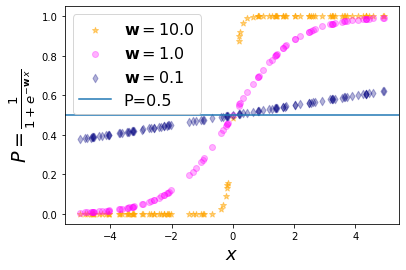

In [2]:
from random import uniform
import math
import matplotlib.pyplot as plt
random1=[]
random2=[]
random3=[]
xlist = []
w=[10, 1,0.1]
for i in range(100):
 x = uniform(-5,5)
 xlist.append(x)
 logreg1 = 1/(1+math.exp(-(w[0]*x)))
 logreg2 = 1/(1+math.exp(-(w[1]*x)))
 logreg3 = 1/(1+math.exp(-(w[2]*x)))
 random1.append(logreg1)
 random2.append(logreg2)
 random3.append(logreg3)
plt.scatter(xlist, random1, marker='*',s=40, c='orange',alpha=0.5,label=r'$\mathbf{w} = %3.1f$'%(w[0]))
plt.scatter(xlist, random2, c='magenta',alpha=0.3,label=r'$\mathbf{w} = %3.1f$'%(w[1]))
plt.scatter(xlist, random3, c='navy',marker='d', alpha=0.3,label=r'$\mathbf{w} = %3.1f$'%(w[2]))
plt.axhline(y=0.5, label='P=0.5')
plt.ylabel(r'$P=\frac{1}{1+e^{-\mathbf{w} \, x}}$', fontsize=19)
plt.xlabel(r'$x$',fontsize=18)
plt.legend(fontsize=16)
plt.show()

* b) Para estudiar la incidencia del parámetro de regularizacion $\ell_2$, que en sklearn se llama C y acompaña al término logistico, se pueden hacer curvas de coeficientes en funcion del C.
Cabe destacar que hay muchas formas equivalentes de generar discriminantes mediante regularización  a partir de la definición de la densidad como regresión logistica, la que usa sklearn es

 $\min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) $

 Observe que si no declara un valor para el parámetro, el clasificador logistic regression se inicializa con los siguientes parámetros 

 __init__(self, penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)


El siguiente código realiza curvas de coeficientes en funcion de log(C), e imprime en patalla los scores correspondientes a acada modelo encontrado.  Realice una curva similar con los scores obtenidos para cada log(C), y plotee ambas curvas en paneles contiguos, para mejor observación. 

A continuación se utiliza la función  LogisticRegressionCV que implementa cross validation para seleccionar el mejor C en forma automática. Compare los resultados obtenidos en la curva de C, y compare el score del mejor. Que concluye? 

La función LogisticRegressionCV tambien guarda los valores de las curvas de C implementadas, y los coeficientes de los modelos. Realice un plot parecido al anterior para mostrar que rango de la curva 'a mano' fue estudiado por LogisticRegressionCV, y si logró encontrar el modelo estable. A fin de cuentas, el modelo de regresion logistica no deberia depender de la regularizacion usada para su cómputo. 

(100, 4)
Curvas de regularizacion en funcion de log(C) ...
This took 0.035s
[[  1.23655434   0.36619954   2.92127679   1.68809978]
 [  0.18467169  -1.2601447   15.7643492   11.72844854]
 [-11.12052963 -12.79050702  38.76738035  40.91553966]
 [-18.73727212 -35.1725877   60.62184925  99.36817374]
 [-19.47075171 -50.99333998  73.08207052 139.8563273 ]
 [-19.47525479 -52.69026849  74.42191529 144.23137584]
 [-19.47523622 -52.77470041  74.4886381  144.44925995]
 [-19.47523477 -52.7786327   74.49174564 144.45940803]
 [-19.47523471 -52.77881525  74.4918899  144.45987913]
 [-19.4752347  -52.77882372  74.4918966  144.459901  ]
 [-19.4752347  -52.77882411  74.49189691 144.45990202]
 [-19.4752347  -52.77882413  74.49189693 144.45990206]
 [-19.4752347  -52.77882413  74.49189693 144.45990207]
 [-19.4752347  -52.77882413  74.49189693 144.45990207]
 [-19.4752347  -52.77882413  74.49189693 144.45990207]
 [-19.4752347  -52.77882413  74.49189693 144.45990207]]
[[0.91]
 [0.96]
 [0.98]
 [0.98]
 [0.98]
 [0

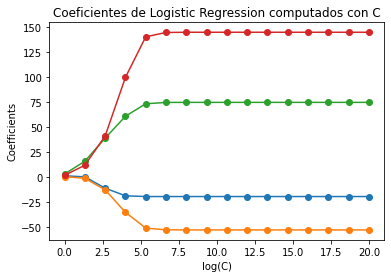

[[-15.23614404 -19.62184474  45.20455064  56.75623795]]
[3.11111111]
0.97


In [3]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

###################################################################
#DATASET

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0] #saco la clase 3, quedan dos clases, cuatro variables.
y = y[y != 0]

X /= X.max()  # Normalice X para acelerar la convergencia
print(X.shape)

##############################################################
print("Curvas de regularizacion en funcion de log(C) ...")


cs = np.logspace(0, 20, 16)
start = time()
clf = linear_model.LogisticRegression(penalty='l2', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True,
                                      intercept_scaling=10000.)
coefs_ = []
scores_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
    scores_.append(clf.score(X,y).ravel().copy())
print("This took %0.3fs" % (time() - start))

coefs_ = np.array(coefs_)
scores_= np.array(scores_)
print(coefs_)
print(scores_)
plt.plot(np.log10(cs), coefs_, marker='o')
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Coeficientes de Logistic Regression computados con C')
plt.axis('tight')
plt.show()

#########################################################
#cross validation for parameter estimation of logistic regression


from sklearn.linear_model import LogisticRegressionCV

#LogisticRegressionCV implements Logistic Regression with built-in cross-validation support,
#to find the optimal C and l1_ratio parameters according to the scoring attribute.
#The “newton-cg”, “sag”, “saga” and “lbfgs” solvers are found to be faster for high-dimensional dense data,
#due to warm-starting (see Glossary).

clf = LogisticRegressionCV(cv=5,penalty='l2', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      intercept_scaling=10000.)
clf.fit(X, y)

coefs_ = []
coefs_.append(clf.coef_.ravel().copy())
coefs_ = np.array(coefs_)

print(coefs_)

CC = clf.C_

print(np.log10(CC))

print(clf.score(X,y))



* b) Estudie la incidencia del parámetro de regularizacion $\ell_1$, que en sklearn se llama C y acompaña al término logistico. Cabe destacar que hay muchas formas equivalentes de generar discriminantes mediante regularización  a partir de la definición de la densidad como regresión logistica.

 $\min_{w, c} \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$

* c) Estudie la incidencia del parámetro de regularizacion Elastic_net, $\rho$ que es una combinación de regularización $\ell_1$ y $\ell_2$, y del parámetro C que acompaña al término logistico. Cabe destacar que hay muchas formas equivalentes de generar discriminantes mediante regularización  a partir de la definición de la densidad como regresión logistica.

 $\min_{w, c} \frac{1 - \rho}{2}w^T w + \rho \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$

## Respuesta

<span style="color:red"> RESPONDA EL INCISO  (b) AQUÍ </span>

<span style="color:red"> RESPONDA EL INCISO  (c) AQUÍ </span>

## Ejercicio 2: 
Sobre el grupo de datos sobre cancer de mama 'data_breast_cancer.csv', aplique knn, lda, Gaussian Naive Bayes, perceptron y logistic regression, separando en 80% train y 20% test cinco veces. Arme las matrices de confusion y curvas ROC y discuta los resultados haciendo énfasis en cuales son los métodos Gaussianos, cuales los no paramétricos y cuales los determinísticos. 
Como combinaria los resultados de los 5 folds en un solo conjunto de métricas y curvas?

Attribute Information:

ID number 2) Diagnosis (M = malignant, B = benign) 3–32)
Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter² / area — 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension (“coastline approximation” — 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#importing the dataset 
df = pd.read_csv('data_breast_cancer.csv')
dataset = df.drop(['Unnamed: 32'], axis=1)
X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 32)


In [6]:
dataset.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [7]:
#Visualization of data
#dataset.groupby('diagnosis').hist(figsize=(12, 12))


In [8]:
dataframe = pd.DataFrame(Y)
#Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y1 = labelencoder_Y.fit_transform(Y)


In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y1, test_size = 0.25, random_state = 0)


In [11]:
#Fitting Naive_Bayes
from sklearn.naive_bayes import GaussianNB
#Fitting Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
#Fitting Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
#Fitting the Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
#Fitting K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
#Fitting LDA Algorithm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Fitting Perceptron
from sklearn.linear_model import Perceptron

#Fitting SVM
#from sklearn.svm import SVC
#Fitting K-SVM
#from sklearn.svm import SVC

In [12]:
classifiers = [
    LogisticRegression(random_state = 0, solver='lbfgs'),
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    GaussianNB(),
    LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
    Perceptron(tol=1e-3),
    DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
    RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)]
    #SVC(kernel="linear", C=1),
    #SVC(kernel = 'rbf', random_state = 0),

In [13]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

LogisticRegression(random_state=0)
Normalized confusion matrix
[[0.98 0.02]
 [0.06 0.94]]


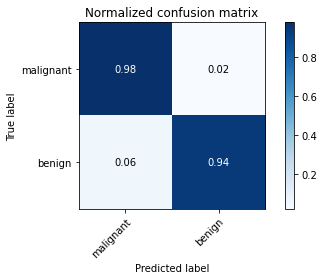

KNeighborsClassifier()
Normalized confusion matrix
[[0.99 0.01]
 [0.11 0.89]]


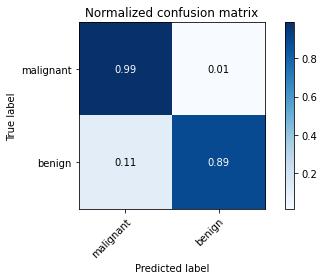

GaussianNB()
Normalized confusion matrix
[[0.93 0.07]
 [0.11 0.89]]


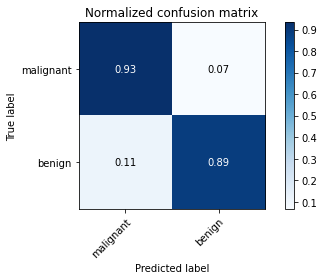

LinearDiscriminantAnalysis(store_covariance=True)
Normalized confusion matrix
[[1.   0.  ]
 [0.08 0.92]]


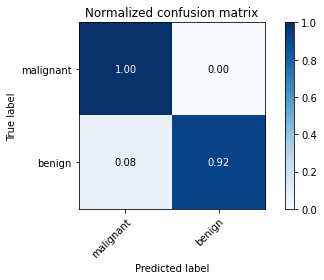

Perceptron()
Normalized confusion matrix
[[0.97 0.03]
 [0.06 0.94]]


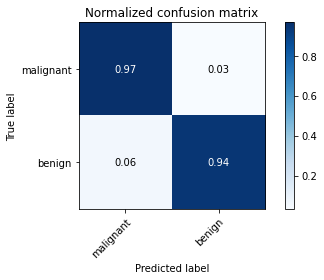

DecisionTreeClassifier(criterion='entropy', random_state=0)
Normalized confusion matrix
[[0.96 0.04]
 [0.04 0.96]]


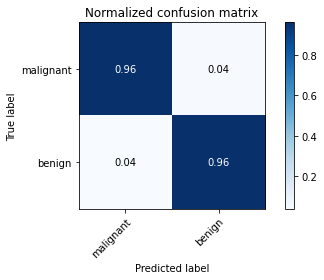

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
Normalized confusion matrix
[[0.99 0.01]
 [0.02 0.98]]


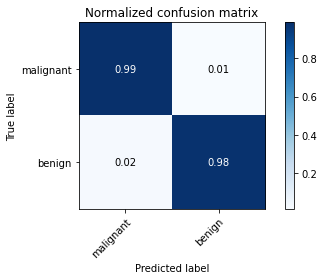

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
Y_labels = np.array(['malignant', 'benign'])

#classes = Y_labels[unique_labels(Y_test, Y_pred)]

    # iterate over classifiers
lst=[]
for clf in  classifiers:
    clf.fit(X_train, Y_train)
    lst.append(clf.score(X_test, Y_test))
    Y_pred = clf.predict(X_test)
    np.set_printoptions(precision=2)
    print(clf)
    # Plot normalized confusion matrix
    plot_confusion_matrix(Y_test, Y_pred, classes=Y_labels, normalize=True,title='Normalized confusion matrix')
    # Plot non-normalized confusion matrix
    #plot_confusion_matrix(Y_test, Y_pred, classes=Y,title='Confusion matrix, without normalization')
    plt.show()

# Plot normalized confusion matrix
#plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,title='Normalized confusion matrix')


In [15]:
print(lst)

[0.965034965034965, 0.951048951048951, 0.916083916083916, 0.972027972027972, 0.958041958041958, 0.958041958041958, 0.986013986013986]


## Reorganice el código anterior y responda las preguntas aquí

<span style="color:red"> RESPONDA EL INCISO  AQUÍ </span>

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_gnb_score = gnb.predict_proba(X_test)

lr = LogisticRegression(random_state = 0, solver='lbfgs') 
lr.fit(X_train, Y_train)
Y_lr_score = lr.decision_function(X_test)

kn=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
kn.fit(X_train, Y_train)
Y_kn_score = kn.predict_proba(X_test)


lda=LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda.fit(X_train, Y_train)
Y_lda_score = lda.predict(X_test)

pe=Perceptron(tol=1e-3)
pe.fit(X_train, Y_train)
Y_pe_score=pe.decision_function(X_test)

Tree=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Tree.fit(X_train, Y_train)
Y_tree_score=Tree.predict_proba(X_test)

RandomForest=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RandomForest.fit(X_train, Y_train)
Y_RandomForest_score=RandomForest.predict_proba(X_test)


fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_test, Y_gnb_score[:, 1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, Y_lr_score)
fpr_kn, tpr_kn, thresholds_kn = roc_curve(Y_test, Y_kn_score[:, 1])
fpr_lda, tpr_lda, thresholds_lda = roc_curve(Y_test, Y_lda_score)
fpr_pe, tpr_pe, thresholds_pe = roc_curve(Y_test, Y_pe_score)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(Y_test, Y_tree_score[:, 1])
fpr_RandomForest, tpr_RandomForest, thresholds_RandomForest = roc_curve(Y_test, Y_RandomForest_score[:, 1])


print('El score para RandomForest es: ', roc_auc_score(Y_test, Y_RandomForest_score[:, 1]))
print('El score para Logistic Regression es: ', roc_auc_score(Y_test, Y_lr_score))
print('El score para Decision Tree es: ', roc_auc_score(Y_test, Y_tree_score[:, 1]))
print('El score para LDA es: ', roc_auc_score(Y_test, Y_lda_score))
print('El score para Perceptron es: ', roc_auc_score(Y_test, Y_pe_score))
print('El score para Knn es: ', roc_auc_score(Y_test, Y_kn_score[:, 1]))

El score para RandomForest es:  0.9990566037735849
El score para Logistic Regression es:  0.9924528301886792
El score para Decision Tree es:  0.958909853249476
El score para LDA es:  0.9622641509433962
El score para Perceptron es:  0.9838574423480084
El score para Knn es:  0.9821802935010482


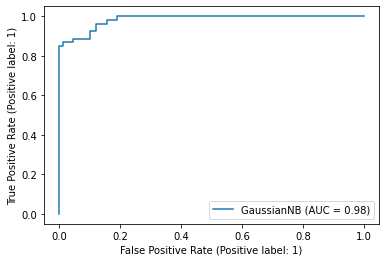

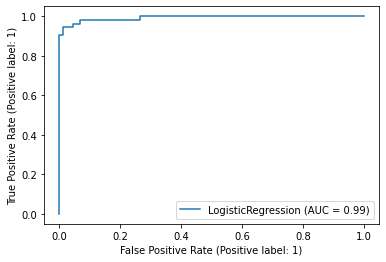

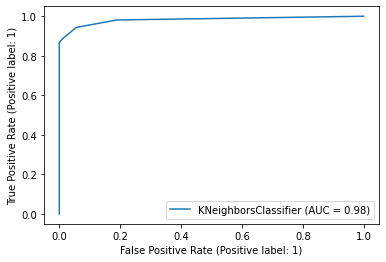

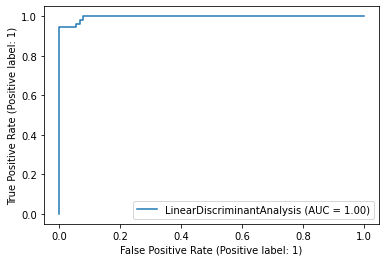

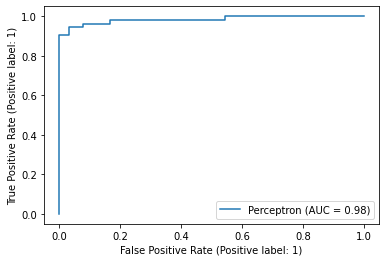

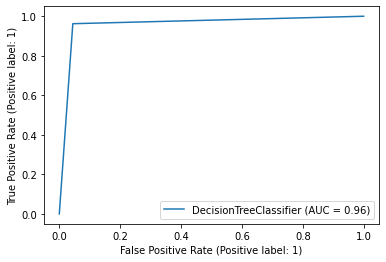

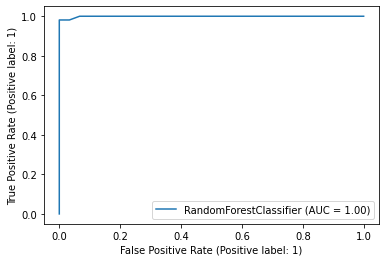

In [17]:
from sklearn import metrics
classifiers = [gnb,lr,kn,lda,pe,Tree,RandomForest]

#plt.subplots(7,1,figsize=(7,49))
for clasifier in classifiers:
#    plt.subplot(7,1,classifiers.index(clasifier)+1)
    metrics.plot_roc_curve(clasifier, X_test, Y_test)

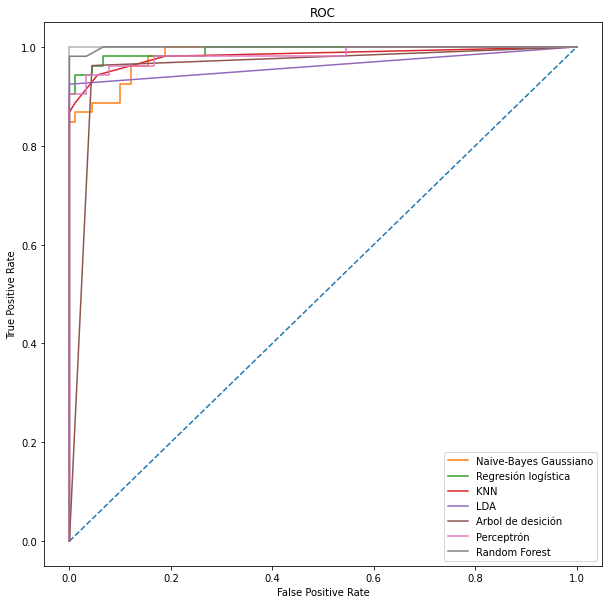

In [73]:
fig = plt.figure(figsize=(10,10))
plt.title('ROC')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot(fpr_gnb, tpr_gnb,label='Naive-Bayes Gaussiano')
plt.plot(fpr_lr, tpr_lr,label='Regresión logística')
plt.plot(fpr_kn, tpr_kn,label='KNN')
plt.plot(fpr_lda, tpr_lda,label='LDA')
plt.plot(fpr_tree, tpr_tree,label='Arbol de desición')
plt.plot(fpr_pe, tpr_pe,label='Perceptrón')
plt.plot(fpr_RandomForest, tpr_RandomForest,label='Random Forest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Podemos ver que el mejor score de curvas ROC esta dado por Random Forest. Sin embargo, si tenemos en cuenta que al ser un conjunto de datos que estamos usando para predecir cuando un tumor es benigno o maligno lo mas importante que nuestro clasificador arroje la menor cantidad posible de falsos negativos (tumores etiquetados como benignos pero que en realidad son malignos), entonces observando las matrices de confusión podemos concluir que el mejor clasificador, dada la naturaleza de nuestros datos, es LDA, ya que no clasifico ningun falso negativo en el conjunto de test.

## Ejercicio 3: 
Realice el mismo estudio con el archivo gender purchase. 

In [66]:
import pandas as pd
gender_df = pd.read_csv('gender_purchase.csv')
gender_df.head()

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [67]:
table = pd.crosstab(gender_df['Gender'], gender_df['Purchase'])
print(table)

Purchase   No  Yes
Gender            
Female    106  159
Male      125  121



## Respuesta

<span style="color:red"> RESPONDA EL INCISO  AQUÍ </span>

In [68]:
gender_df['Gender'].replace({'Female': 'F', 'Male': 'M'}, inplace=True)
#gender_df = gender_df.replace({'Female':1, 'Male':0})
#gender_df = gender_df.replace({'Yes':1, 'No':0})
gender_df.head()

,Gender,Purchase
0,F,Yes
1,F,Yes
2,F,No
3,M,No
4,M,Yes


In [69]:
from sklearn.preprocessing import OrdinalEncoder

X = gender_df.iloc[:, 0].values
X = X.reshape(-1, 1)
Y = gender_df.iloc[:, 1].values

encoder_X = OneHotEncoder()
labelencoder_Y = LabelEncoder()
X = encoder_X.fit_transform(X)
Y1 = labelencoder_Y.fit_transform(Y)

#sc = StandardScaler()
#X = X.todense(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y1, test_size = 0.25, random_state = 0)

In [70]:
X_train = X_train.todense()
X_test = X_test.todense()

In [71]:
classifiers = [
    LogisticRegression(random_state = 0, solver='lbfgs'),
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    GaussianNB(),
    #LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
    Perceptron(tol=1e-3),
    DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
    RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)]
    #SVC(kernel="linear", C=1),
    #SVC(kernel = 'rbf', random_state = 0),

LogisticRegression(random_state=0)
Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


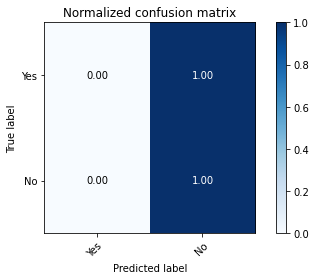

KNeighborsClassifier()
Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


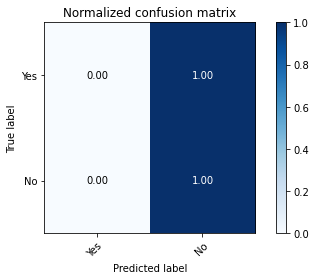

GaussianNB()
Normalized confusion matrix
[[0.6  0.4 ]
 [0.49 0.51]]


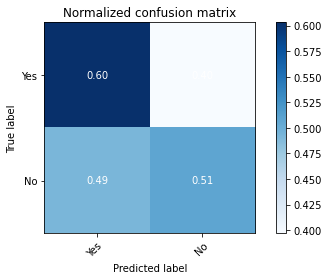

Perceptron()
Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


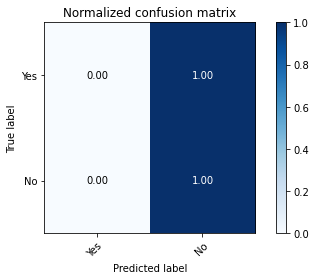

DecisionTreeClassifier(criterion='entropy', random_state=0)
Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


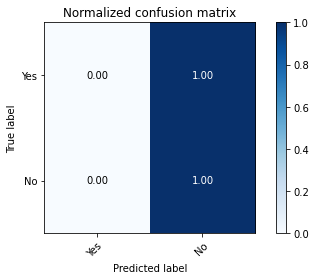

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


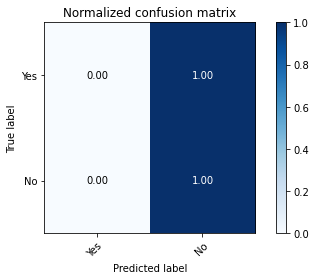

In [72]:
Y_labels = np.array(['Yes', 'No'])
for clf in  classifiers:
    clf.fit(X_train, Y_train)
    lst.append(clf.score(X_test, Y_test))
    Y_pred = clf.predict(X_test)
    np.set_printoptions(precision=2)
    print(clf)
    # Plot normalized confusion matrix
    plot_confusion_matrix(Y_test, Y_pred, classes=Y_labels, normalize=True,title='Normalized confusion matrix')
    # Plot non-normalized confusion matrix
    #plot_confusion_matrix(Y_test, Y_pred, classes=Y,title='Confusion matrix, without normalization')
    plt.show()